# Model fitting demonstration 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # only for plot prettiness
%pylab inline

import compartmentmodels.compartmentmodels as CM

Populating the interactive namespace from numpy and matplotlib


We have obtained some data from a lung perfusion measurement. This data is contained in a comma-separated-values-file. The name says it all, columns are separated by commas, and rows by newlines. Such data can be loaded with standard numpy, but for convenience, we use a function from the compartment model library:

In [5]:
time, curve, aif = CM.loaddata('tests/lung.csv')


At first, let us have a look at our data:

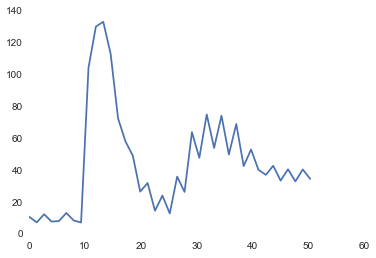

In [11]:
plt.plot(time,aif)

Aha. We see a clear first pass of the contrast agent, followed by (noisy) recirculation. Also, we see a high temporal resolution, approximately in the second range. What about our tissue curve?

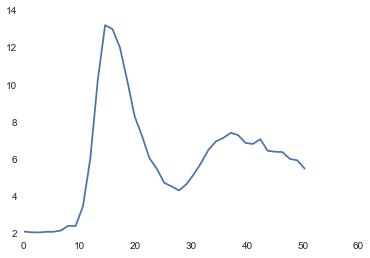

In [13]:
plt.plot(time, curve)

The tissue curve is quite similar to the aif, only the scaling is different. This strongly hints to one compartment situation.


Great. Let us use a one-compartment model. But first, we need to convert the signal (Hint: the curves have a non-zero initial value) to concentration. We will use the absolute signal enhancement, for simplicity, i.e. we subtract the mean value of the first 7 frames:


In [25]:
curve=curve-curve[0:6].mean()
aif=aif-aif[0:6].mean()

model = CM.CompartmentModel(time=time, curve=curve, aif =aif)

In [26]:
fit_result=model.fit_model(startdict={"F":150.0, "v":10.})
print fit_result

True


In [27]:
print model.OptimizeResult

  status: 0
 success: True
    nfev: 36
     fun: 11.018383035139323
       x: array([ 0.03350553,  0.27635468])
 message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     jac: array([ 0.00523066, -0.00021192])
     nit: 7


In [28]:
print model.get_parameters()


{'v': 12.124103231294713, 'Iterations': 7, 'MTT': 3.6185382733534244, 'F': 201.03316282006139}


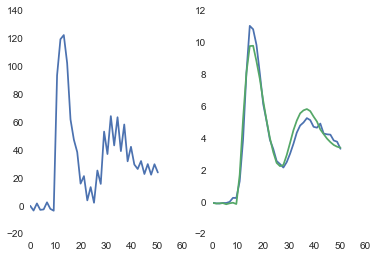

In [29]:
f, (a1,a2) = plt.subplots(1,2,sharex=True)
a1.plot(time, aif)
a2.plot(time, curve)
a2.plot(time, model.fit, label='Fit')
